In [1]:
# Data analysis and wrangling
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pydot

# show plots in Jupyter Notebook browser
%matplotlib inline 

# Jupyter enviornment
from IPython.core.display import display, HTML

# Datetime
import datetime

# Machine Learning
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestRegressor

# ML helper functions
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error

In [8]:
# Read in the file
relative_path = '../data/rtb-ad-dataset.csv'
ads_df = pd.read_csv(relative_path)

In [9]:
# Display the first 5 rows
ads_df.head()

,date,site_id,ad_type_id,geo_id,device_category_id,advertiser_id,order_id,line_item_type_id,os_id,integration_type_id,monetization_channel_id,ad_unit_id,total_impressions,total_revenue,viewable_impressions,measurable_impressions,revenue_share_percent
0,2019-06-30 00:00:00,351,10,187,2,84,3473,19,60,1,4,5174,16,0.0,2,16,1
1,2019-06-30 00:00:00,351,10,187,2,84,3473,19,58,1,4,5174,6,0.0,0,6,1
2,2019-06-30 00:00:00,351,10,147,2,84,3473,19,60,1,4,5174,4,0.0,0,4,1
3,2019-06-30 00:00:00,351,10,147,2,84,3473,19,58,1,4,5174,4,0.0,0,4,1
4,2019-06-30 00:00:00,348,10,147,3,79,3463,20,59,1,19,5138,4,0.0,0,4,1


In [10]:
# Display the number of rows and columns
ads_df.shape

(567291, 17)

In [11]:
# Replace existing date column with datetime
ads_df['date'] = pd.to_datetime(ads_df['date'])

# Function to extract the Year, Month, Day, Weekday, and Day Of Week from date column in dataframe
def get_date_attributes(df):
    
    # Retrieve year of date
    ads_df['year'] = ads_df['date'].apply(lambda x: x.year)
    
    # Retrieve month of date
    ads_df['month'] = ads_df['date'].apply(lambda x: x.month)
    
    # Retrieve day of date
    ads_df['day'] = ads_df['date'].apply(lambda x: x.day)
    
    # Retrieve month of date
    ads_df['weekday'] = ads_df['date'].apply(lambda x: x.weekday())    

    # Retrieve month of date
    ads_df['day_of_week'] = ads_df['date'].apply(lambda x: x.strftime("%A"))
    
# Retrieve date attributes
get_date_attributes(ads_df)

# Calculate the CPM. CPM = (total_revenue / measurable_impressions) x revenue_share_percent x 1000. 
def revenue_per_impression(r, i):
    return r / i if i else 0

ads_df['revenue_per_imp'] = ads_df.apply(lambda x: revenue_per_impression(((x['total_revenue'])*x['revenue_share_percent']),x['measurable_impressions']) , axis=1)
ads_df['CPM'] = ads_df['revenue_per_imp'].apply(lambda x: x*1000)

In [12]:
ads_df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
site_id,567291.0,347.11,2.93,342.00,345.0,346.0,350.00,351.00
ad_type_id,567291.0,10.22,1.22,10.00,10.0,10.0,10.00,17.00
geo_id,567291.0,110.23,66.18,1.00,39.0,122.0,183.00,308.00
device_category_id,567291.0,1.90,0.79,1.00,1.0,2.0,3.00,5.00
advertiser_id,567291.0,262.08,627.33,8.00,79.0,88.0,139.00,2646.00
order_id,567291.0,1951.27,1652.55,45.00,45.0,3438.0,3460.00,3489.00
line_item_type_id,567291.0,12.63,6.81,3.00,4.0,11.0,19.00,20.00
os_id,567291.0,57.22,1.96,15.00,56.0,57.0,58.00,60.00
integration_type_id,567291.0,1.00,0.00,1.00,1.0,1.0,1.00,1.00
monetization_channel_id,567291.0,14.43,7.14,1.00,4.0,19.0,19.00,21.00


In [13]:
# Save a copy of the original dataframe in new variable
ads_df_original = ads_df.copy()

# Filter out all oberservations with negative CPM
ads_df = ads_df[ads_df['CPM'] >= 0]

# Filter out the outliers from the dataset 
ads_df = ads_df[ads_df['CPM'] <= ads_df['CPM'].quantile(0.95)]

print('***** DATASET *****')
print("Original: {}".format(ads_df_original.shape))
print("Filtered: {}".format(ads_df.shape))
print('')
print("Remaining: {:.2f}%".format((ads_df.shape[0] /ads_df_original.shape[0])*100))

***** DATASET *****
Original: (567291, 24)
Filtered: (538926, 24)

Remaining: 95.00%


In [14]:
ads_df = ads_df.sample(50000)

In [15]:
feature_list = ['advertiser_id', 
                'order_id', 
                'monetization_channel_id', 
                'line_item_type_id', 
                'site_id', 
                'ad_unit_id', 
                'ad_type_id', 
                'geo_id', 
                'device_category_id', 
                'os_id']

target_col = 'CPM'

X = ads_df[feature_list]
y = ads_df[target_col]

In [16]:
print(X.shape)
print(y.shape)

(50000, 10)
(50000,)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print('***** TRAIN/TEST SPLIT *****')
print('X       : ', X.shape)
print('y       : ', y.shape)
print('X_train : ', X_train.shape)
print('y_train : ', y_train.shape)
print('X_test  : ', X_test.shape)
print('y_test  : ', y_test.shape)
print('')
print('Training: {:0.2f}'.format(X_train.shape[0]/X.shape[0]))

***** TRAIN/TEST SPLIT *****
X       :  (50000, 10)
y       :  (50000,)
X_train :  (40000, 10)
y_train :  (40000,)
X_test  :  (10000, 10)
y_test  :  (10000,)

Training: 0.80


In [22]:
# Instantiate Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=200, random_state=42)

# Get Default Paramaters
rf_reg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [23]:
# Train the model on training data
rf_reg.fit(X_train,y_train)

# Predict using test set
y_pred = rf_reg.predict(X_test)

In [24]:
# Display performance metrics
print("R Squared  : {:.3f}".format(rf_reg.score(X_test, y_test))) # Return the coefficient of determination of the prediction.
print('MSE Score  : {:.3f}'.format(mean_squared_error(y_test, y_pred)))
print('RMSE Score : {:.3f}'.format((np.sqrt(mean_squared_error(y_test, y_pred)))))

R Squared  : 0.629
MSE Score  : 0.387
RMSE Score : 0.622


In [25]:
# Compute feature importance
feature_importance = pd.DataFrame({'feature': feature_list, 'importance': rf_reg.feature_importances_}).sort_values('importance', ascending=False)
feature_importance

,feature,importance
3,line_item_type_id,0.276866
1,order_id,0.216786
5,ad_unit_id,0.184350
7,geo_id,0.182552
9,os_id,0.041271
6,ad_type_id,0.036725
0,advertiser_id,0.028583
8,device_category_id,0.017871
4,site_id,0.013300
2,monetization_channel_id,0.001695


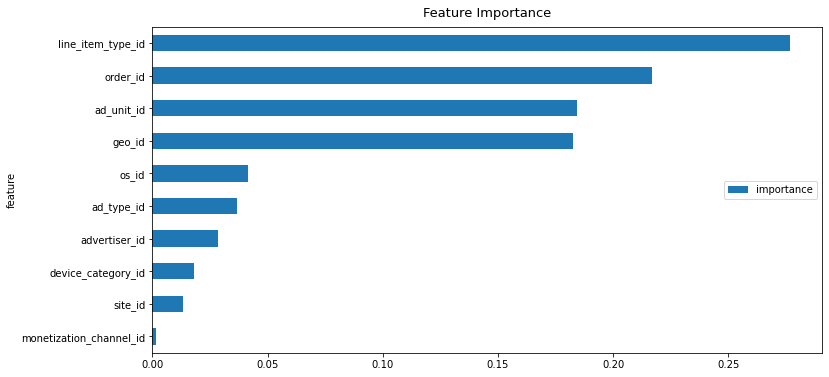

In [26]:
# Plot the feature importance
feature_importance = pd.DataFrame({'feature': feature_list, 'importance': rf_reg.feature_importances_}).sort_values('importance')
ax = feature_importance.plot(x='feature', y='importance', kind='barh', figsize=(12,6))
ax.set_title("Feature Importance", fontsize=13, pad=10)
ax.legend(loc='center right');

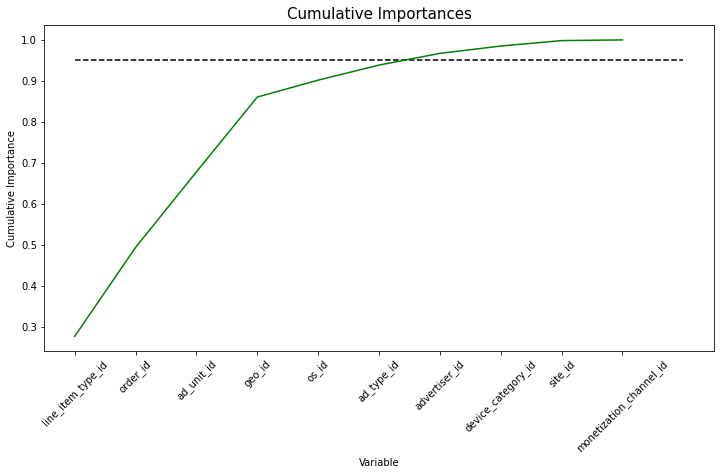

In [27]:
# Plot the cumulative feature importance

# Sort Feature Importance
sorted_feature_importances = feature_importance.sort_values('importance', ascending=False).reset_index(drop=True)
sorted_feature_importances = sorted_feature_importances['importance']

# Sort Features
sorted_features = feature_importance.sort_values('importance', ascending=False).reset_index(drop=True)
sorted_features = sorted_features['feature']

# Cumulative importances
cumulative_importances = np.cumsum(sorted_feature_importances)

# Make a line graph
plt.figure(figsize=(12,6))
plt.plot(sorted_features, cumulative_importances, 'g-')

# Draw line at 95% of importance attained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_feature_importances), color = 'black', linestyles = 'dashed')
plt.xticks(sorted_features, sorted_features, rotation=45)
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); 
plt.title('Cumulative Importances', fontsize=15);

In [28]:
import pickle

# context manager: opens file > write file > close out file
# .pkl extension, wb = write byte, assign alias
# Warning: only pickle files you know of or wrote. They can be embedded code that has virus or malicious code.

with open('../models/rf_reg_super_simple_model.pkl', 'wb') as pickle_file:
    pickle.dump(rf_reg, pickle_file)

### Combine Predicted CPM Values w/ Original Dataset

In [ ]:
# Predict values for entire dataset
predictions = rf_reg.predict(X)
predictions

In [ ]:
ads_df['pred_CPM'] = predictions
ads_df

,date,site_id,ad_type_id,geo_id,device_category_id,advertiser_id,order_id,line_item_type_id,os_id,integration_type_id,monetization_channel_id,ad_unit_id,total_impressions,total_revenue,viewable_impressions,measurable_impressions,revenue_share_percent,year,month,day,weekday,day_of_week,revenue_per_imp,CPM,pred_CPM
0,2019-06-30,351,10,187,2,84,3473,19,60,1,4,5174,16,0.0000,2,16,1,2019,6,30,6,Sunday,0.000000,0.000000,0.000000
1,2019-06-30,351,10,187,2,84,3473,19,58,1,4,5174,6,0.0000,0,6,1,2019,6,30,6,Sunday,0.000000,0.000000,0.000000
2,2019-06-30,351,10,147,2,84,3473,19,60,1,4,5174,4,0.0000,0,4,1,2019,6,30,6,Sunday,0.000000,0.000000,0.000000
3,2019-06-30,351,10,147,2,84,3473,19,58,1,4,5174,4,0.0000,0,4,1,2019,6,30,6,Sunday,0.000000,0.000000,0.000000
4,2019-06-30,348,10,147,3,79,3463,20,59,1,19,5138,4,0.0000,0,4,1,2019,6,30,6,Sunday,0.000000,0.000000,0.008400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567286,2019-06-01,350,10,187,3,79,3456,20,59,1,19,5168,12,0.0254,4,12,1,2019,6,1,5,Saturday,0.002117,2.116667,1.352730
567287,2019-06-01,350,10,187,1,79,3456,20,56,1,19,5168,68,0.3400,52,66,1,2019,6,1,5,Saturday,0.005152,5.151515,2.378925
567288,2019-06-01,350,10,158,1,79,3456,20,56,1,19,5168,2,0.0046,0,2,1,2019,6,1,5,Saturday,0.002300,2.300000,1.086575
567289,2019-06-01,350,10,33,1,79,3456,20,56,1,19,5168,6,0.0120,0,6,1,2019,6,1,5,Saturday,0.002000,2.000000,1.646570


In [ ]:
def prediction_accuracy(df):
  ads_df['Error'] = ads_df['CPM'] - ads_df['pred_CPM']
  ads_df['Pct_Error'] = ads_df['Error'] / ads_df['pred_CPM']
  accuracy = ads_df['Pct_Error'] * 100
  ads_df['Accuracy'] = abs(100 - abs(accuracy))
  return df

prediction_accuracy(ads_df)

,date,site_id,ad_type_id,geo_id,device_category_id,advertiser_id,order_id,line_item_type_id,os_id,integration_type_id,monetization_channel_id,ad_unit_id,total_impressions,total_revenue,viewable_impressions,measurable_impressions,revenue_share_percent,year,month,day,weekday,day_of_week,revenue_per_imp,CPM,pred_CPM,Error,Pct_Error,Accuracy
0,2019-06-30,351,10,187,2,84,3473,19,60,1,4,5174,16,0.0000,2,16,1,2019,6,30,6,Sunday,0.000000,0.000000,0.000000,0.000000,NaN,NaN
1,2019-06-30,351,10,187,2,84,3473,19,58,1,4,5174,6,0.0000,0,6,1,2019,6,30,6,Sunday,0.000000,0.000000,0.000000,0.000000,NaN,NaN
2,2019-06-30,351,10,147,2,84,3473,19,60,1,4,5174,4,0.0000,0,4,1,2019,6,30,6,Sunday,0.000000,0.000000,0.000000,0.000000,NaN,NaN
3,2019-06-30,351,10,147,2,84,3473,19,58,1,4,5174,4,0.0000,0,4,1,2019,6,30,6,Sunday,0.000000,0.000000,0.000000,0.000000,NaN,NaN
4,2019-06-30,348,10,147,3,79,3463,20,59,1,19,5138,4,0.0000,0,4,1,2019,6,30,6,Sunday,0.000000,0.000000,0.008400,-0.008400,-1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567286,2019-06-01,350,10,187,3,79,3456,20,59,1,19,5168,12,0.0254,4,12,1,2019,6,1,5,Saturday,0.002117,2.116667,1.352730,0.763936,0.564737,43.526330
567287,2019-06-01,350,10,187,1,79,3456,20,56,1,19,5168,68,0.3400,52,66,1,2019,6,1,5,Saturday,0.005152,5.151515,2.378925,2.772590,1.165480,16.548042
567288,2019-06-01,350,10,158,1,79,3456,20,56,1,19,5168,2,0.0046,0,2,1,2019,6,1,5,Saturday,0.002300,2.300000,1.086575,1.213425,1.116742,11.674243
567289,2019-06-01,350,10,33,1,79,3456,20,56,1,19,5168,6,0.0120,0,6,1,2019,6,1,5,Saturday,0.002000,2.000000,1.646570,0.353430,0.214646,78.535357


In [21]:
# Save copy of output to google drive
ads_df.to_csv('/content/drive/MyDrive/Data/rtb-ad-dataset-predictions.csv', index=False)

# Takeaways

1. Make sure production code is working correctly
2. See how streamlit application is processing python file or model
3. If model runs correctly, troubleshoot streamlit
4. Learnings - have to transform record for model to predict.
